
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [6]:
import pandas as pd
bank = pd.read_csv('../../data/bank.csv')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [ ]:
# Perform what ever steps you need to familiarize yourself with the data:

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

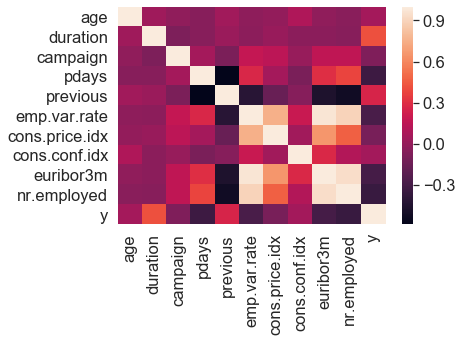

In [8]:
sns.heatmap(bank.corr())

In [9]:
bank.shape

(4119, 21)

In [10]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [11]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
bank.y.value_counts()

0    3668
1     451
Name: y, dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [ ]:
# Do the coefficient thing to see how much they are relevant. "coef = LogReg1.coef_[0]"

In [15]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241


In [50]:
features = ['duration', 'campaign', 'poutcome', 'y']

In [51]:
bank1 = bank[features]


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Build a Model**  

In [54]:
bank_model = pd.get_dummies(bank1[['duration', 'campaign', 'poutcome', 'y']], drop_first=True)

In [56]:
LogReg = LogisticRegression()

feature_cols = ['duration', 'campaign', 'poutcome']

X = bank_model.drop('y', axis=1)
y = bank_model['y']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
LogReg.fit(X_train, y_train)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [59]:
cf = bank_model.columns.drop('y')

coef = LogReg.coef_[0]

pd.DataFrame([cf,coef],index = ['cf','Coef']).transpose()

,cf,Coef
0,duration,0.00427704
1,campaign,-0.166755
2,poutcome_nonexistent,-0.933278
3,poutcome_success,2.29597


In [ ]:
# It seems like the success of previous campaigns has a very high coefficient.

**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [60]:
# A:
y_pred = LogReg.predict(X_test)

In [61]:
metrics.accuracy_score(y_test,y_pred)

0.9009708737864077

In [62]:
metrics.confusion_matrix(y_test,y_pred)

array([[885,  23],
       [ 79,  43]], dtype=int64)

In [63]:
metrics.roc_auc_score(y_test,y_pred)

0.6635643099588359

In [64]:
metrics.log_loss(y_test,y_pred)

3.420362701962898

### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [72]:
# A;
features2 = ['age', 'job', 'education', 'y']
bank2 = bank[features2]

In [73]:
bank_model2 = pd.get_dummies(bank2[['age', 'job', 'education', 'y']], drop_first=True)

In [74]:
LogReg2 = LogisticRegression()

feature_cols2 = ['age', 'job', 'education']

X2 = bank_model2.drop('y', axis=1)
y2 = bank_model2['y']

In [75]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [76]:
LogReg2.fit(X2_train, y2_train)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
cf2 = bank_model2.columns.drop('y')

coef = LogReg2.coef_[0]

pd.DataFrame([cf2,coef],index = ['cf2','Coef']).transpose()

,cf2,Coef
0,age,0.0162479
1,job_blue-collar,-0.474586
2,job_entrepreneur,-1.30952
3,job_housemaid,-0.388112
4,job_management,-0.350068
5,job_retired,0.446948
6,job_self-employed,-0.436368
7,job_services,-0.372468
8,job_student,0.567571
9,job_technician,-0.23991


In [78]:
y_pred2 = LogReg2.predict(X2_test)

In [79]:
metrics.accuracy_score(y2_test,y_pred2)

0.8961165048543689

In [80]:
metrics.confusion_matrix(y2_test,y_pred2)

array([[923,   0],
       [107,   0]], dtype=int64)

In [81]:
metrics.roc_auc_score(y2_test,y_pred2)

0.5

In [82]:
metrics.log_loss(y2_test,y_pred2)

3.588008809956741



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [84]:
# A:
y_pred_prob = LogReg2.predict_proba(X2_test)

y_pred_prob

array([[0.85924564, 0.14075436],
       [0.88584134, 0.11415866],
       [0.88978077, 0.11021923],
       ...,
       [0.94343562, 0.05656438],
       [0.90412511, 0.09587489],
       [0.87244746, 0.12755254]])

**Visualize the distribution**

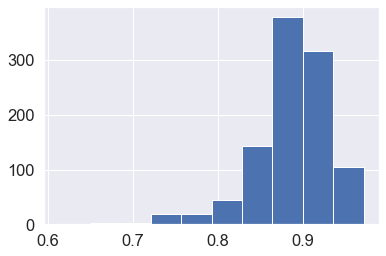

(array([105., 316., 378., 143.,  44.,  19.,  18.,   3.,   3.,   1.]),
 array([0.0284409 , 0.06421999, 0.09999908, 0.13577818, 0.17155727,
        0.20733636, 0.24311546, 0.27889455, 0.31467364, 0.35045274,
        0.38623183]),
 <a list of 10 Patch objects>)

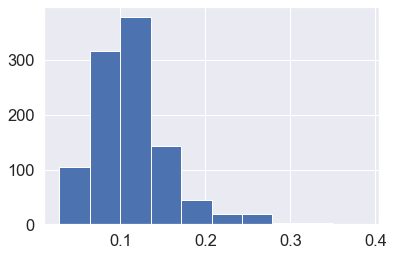

In [85]:
# A:
y_pred_prob_t = y_pred_prob.transpose()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob_t[0])
plt.show()
plt.hist(y_pred_prob_t[1])

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [86]:
# A:
y_pred3=[]
for prob in y_pred_prob_t[1]:
    if prob > .20:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
        
print(len(y_pred3))
print(len(y2_test))

1030
1030


In [87]:
y_pred3.count(1) 

51

**Evaluate the model metrics now**

In [88]:
# A:
metrics.accuracy_score(y2_test,y_pred3)

0.8640776699029126

In [89]:
metrics.confusion_matrix(y2_test,y_pred3)

array([[881,  42],
       [ 98,   9]], dtype=int64)

In [90]:
metrics.roc_auc_score(y2_test,y_pred3)

0.5193041787750224

In [91]:
metrics.log_loss(y2_test,y_pred3)

4.694623571242295

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [92]:
# A:

bank_complete = pd.get_dummies(bank, drop_first = True)

LogReg3 = LogisticRegression()

X3 = bank_complete.drop('y', axis =1)
y3 = bank_complete['y']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3)

LogReg3.fit(X3_train, y3_train)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
y_pred3 = LogReg3.predict(X3_test)

In [94]:
metrics.confusion_matrix(y3_test, y_pred3)

array([[896,  27],
       [ 63,  44]], dtype=int64)

In [95]:
metrics.roc_auc_score(y3_test, y_pred3)

0.690981257783943

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'